In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 

In [3]:
colors = {'blue': (255, 0, 0), 'green': (0, 255, 0), 'red': (0, 0, 255), 'yellow': (0, 255, 255), 'magenta': (255, 0, 255), 'cyan': (255, 255, 0), 'white': (255, 255, 255), 'black': (0, 0, 0), 'gray': (125, 125, 125), 'rand': np.random.randint(0, high=256, size=(3,)).tolist(), 'dark_gray': (50, 50, 50), 'light_gray': (220, 220, 220)}
print(colors['magenta'])

(255, 0, 255)


In [4]:
image = np.zeros((400, 400, 3), dtype="uint8")
image[:] = colors['light_gray']

In [5]:
def show_with_matplotlib(img, title):
    img_RGB = img[:,:,::-1]
    
    plt.imshow(img_RGB)
    plt.title("title")
    plt.show()

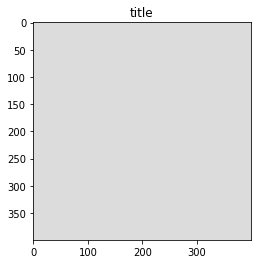

In [7]:
show_with_matplotlib(image, ' ')

# Drawing basic shapes

Common parameters:

- `img`: It is the image where the shape will be drawn
- `colo`: Is the color BGR used to draw the shape
- `thickness`: If this value is positiv, it is the thickness of the shape outline. Otherwis, a filled shape will be drawn.
- `lineType`: It is the type of the shape boundary
    - cv2.LINE_4: four connected-lines Bresenham algorithm.
    - cv2.LINE_8: eight connected-lines Bresenham algorithm.
    - cv2.LLIINEAA: Anti-aliased line, the Gaussian filtering algorithm is used
- shift: The number of fractional bits in connection with the number of fractional bits in connection with the coordinates of some points defining the shape

# Drawing lines

img = line(img, pt1, pt2, color, thickness=1, lineType=8, shift=0)

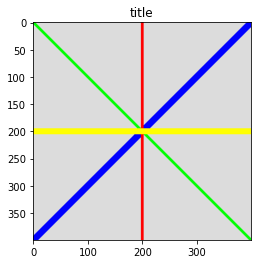

In [9]:
cv2.line(image, (0, 0), (400, 400), colors['green'], 3)
cv2.line(image, (0, 400), (400, 0), colors['blue'], 10)
cv2.line(image, (200, 0), (200, 400), colors['red'], 3)
cv2.line(image, (0, 200), (400, 200), colors['yellow'], 10)
show_with_matplotlib(image, 'Lines')

# Drawing rectangles

img = rectangle(img, pt1, pt2, color, thickness=1, lineType=8, shift=0)

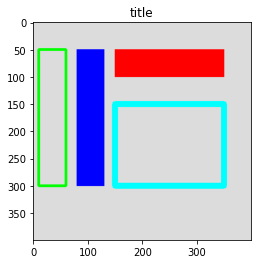

In [11]:
image = np.zeros((400, 400, 3), dtype="uint8")
image[:] = colors['light_gray']

cv2.rectangle(image, (10, 50), (60, 300), colors['green'], 3)
cv2.rectangle(image, (80, 50), (130, 300), colors['blue'], -1)
cv2.rectangle(image, (150, 50), (350, 100), colors['red'], -1)
cv2.rectangle(image, (150, 150), (350, 300), colors['cyan'], 10)

show_with_matplotlib(image, 'Rectangles')

# Drawing circles

img = circle(img, center, radius, color, thickness=1, lineType=8, shift=0) 

In [12]:
image = np.zeros((400, 400, 3), dtype="uint8")
image[:] = colors['light_gray']

cv2.circle(image, (50, 50), 20, colors['green'], 3)
cv2.circle(image, (100, 100), 30, colors['blue'], -1)
cv2.circle(image, (200, 200), 40, colors['magenta'], 10)
cv2.circle(image, (300, 300), 40, colors['cyan'], -1)

show_whith_matplotlib(image, 'Circles')

NameError: name 'show_whith_matplotlib' is not defined

# Advanced shapes



In [13]:
image = np.zeros((300, 300, 3), dtype="uint8")
image[:] = colors['light_gray']

# Drawing a clip line

The signature for the cv2.clipLine() function is as follows as follows:

retval, pt1, pt2 = clipLine(imgRect, pt1, pt2)

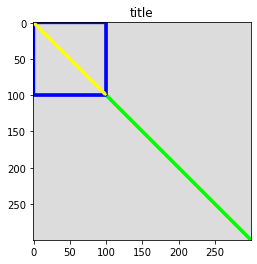

In [14]:
cv2.line(image, (0, 0), (300, 300), colors['green'], 3)
cv2.rectangle(image, (0, 0), (100, 100), colors['blue'], 3)

ret, p1, p2 = cv2.clipLine((0, 0, 100, 100), (0, 0), (300, 300))
if ret:
    cv2.line(image, p1, p2, colors['yellow'], 3)
    
show_with_matplotlib(image, 'Clip line')

# Drawing arrows

The signature for this function is as follows:

cv.arrowedLine(img, pt1, pt2, color, thickness=1, lineType=8, shift=0, tipLength=0.1)

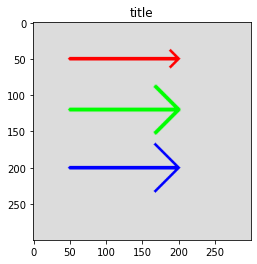

In [15]:
image = np.zeros((300, 300, 3), dtype="uint8")
image[:] = colors['light_gray']

cv2.arrowedLine(image, (50, 50), (200, 50), colors['red'], 3, 8, 0, 0.1)
cv2.arrowedLine(image, (50, 120), (200, 120), colors['green'], 3, cv2.LINE_AA, 0, 0.3)
cv2.arrowedLine(image, (50, 200), (200, 200), colors['blue'], 3, 8, 0, 0.3)

show_with_matplotlib(image, 'Arrows')

# Drawing ellipses

The signature for this function is as follows:

cv2.ellipse(img, center, axes, angle, startAngle, endAngle, color, thickness=1, lineType=8, shift=0)

- The angle parameter (in degrees) allows you rotate the ellipse
- The axes parameter constrols the size of the ellipse corresponding to half the size of the axes
- In a full ellipse starAngle=0 and endAngle=360 

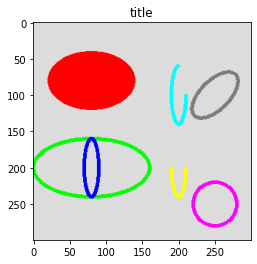

In [19]:
image = np.zeros((300, 300, 3), dtype="uint8")
image[:] = colors['light_gray']

cv2.ellipse(image, (80, 80), (60, 40), 0, 0, 360, colors['red'], -1)
cv2.ellipse(image, (80, 200), (80, 40), 0, 0, 360, colors['green'], 3)
cv2.ellipse(image, (80, 200), (10, 40), 0, 0, 360, colors['blue'], 3)
cv2.ellipse(image, (200, 200), (10, 40), 0, 0, 180, colors['yellow'], 3)
cv2.ellipse(image, (200, 100), (10, 40), 0, 0, 270, colors['cyan'], 3)
cv2.ellipse(image, (250, 250), (30, 30), 0, 0, 360, colors['magenta'], 3)
cv2.ellipse(image, (250, 100), (20, 40), 45, 0, 360, colors['gray'], 3)

show_with_matplotlib(image, 'Arrows')

# Drawing polygons

The signature for this function is as follows:

cv2.polylines(img, pts, isClosed, color, thickness=1, lineType=8, shift=0)

In [21]:
pts = np.array([[250, 5], [220, 80], [280, 80]], np.int32)
print(pts)
print("shape of pts '{}'".format(pts.shape))
pts = pts.reshape((-1, 1, 2))
print(pts)
print("shape of pts '{}'".format(pts.shape))


[[250   5]
 [220  80]
 [280  80]]
shape of pts '(3, 2)'
[[[250   5]]

 [[220  80]]

 [[280  80]]]
shape of pts '(3, 1, 2)'


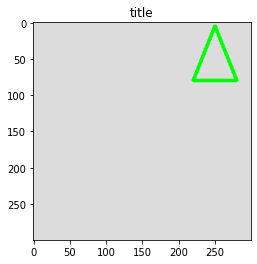

In [14]:
image[:] = colors['light_gray']

cv2.polylines(image, [pts], True, colors['green'], 3)
show_with_matplotlib(image, 'Polygons')

shape of pts '(3, 1, 2)'
shape of pts '(5, 1, 2)'
shape of pts '(5, 1, 2)'
shape of pts '(4, 1, 2)'
shape of pts '(4, 1, 2)'


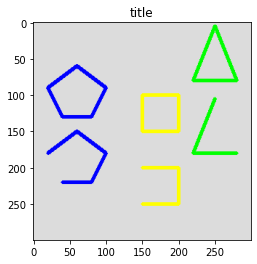

In [22]:
# These points define a triangle: 
pts = np.array([[250, 105], [220, 180], [280, 180]], np.int32)
pts = pts.reshape((-1, 1, 2))
print("shape of pts '{}'".format(pts.shape))
cv2.polylines(image, [pts], False, colors['green'], 3)

# These points define a pentagon:
pts = np.array([[20, 90], [60, 60], [100, 90], [80, 130], [40, 130]], np.int32)
pts = pts.reshape((-1, 1, 2))
print("shape of pts '{}'".format(pts.shape))
cv2.polylines(image, [pts], True, colors['blue'], 3)

# These points define a pentagon:
pts = np.array([[20, 180], [60, 150], [100, 180], [80, 220], [40, 220]], np.int32)
pts = pts.reshape((-1, 1, 2))
print("shape of pts '{}'".format(pts.shape))
cv2.polylines(image, [pts], False, colors['blue'], 3)

# These points define a rectangle:
pts = np.array([[150, 100], [200, 100], [200, 150], [150, 150]], np.int32)
pts = pts.reshape((-1, 1, 2))
print("shape of pts '{}'".format(pts.shape))
cv2.polylines(image, [pts], True, colors['yellow'], 3)

# These points define a rectangle:
pts = np.array([[150, 200], [200, 200], [200, 250], [150, 250]], np.int32)
pts = pts.reshape((-1, 1, 2))
print("shape of pts '{}'".format(pts.shape))
cv2.polylines(image, [pts], False, colors['yellow'], 3)

show_with_matplotlib(image, 'cv2.polylines()')

# Shift parameters in drawing functions

Some of the previous fucntions (the ones with the shift parameters) can works with sub-pixel accuracy in connection with the pixel coodinates. To cope with this, you should pass the coordinates as fixed-point numbers, with are encoded as integers.

In [38]:
def draw_float_circle(img, center, radius, color, thickness=1, lineType=8, shift=4):
    factor = 2 ** shift
    center = (int(round(center[0] * factor)), int(round(center[1] * factor)))
    radius = int(round(radius * factor))
    cv2.circle(img, center, radius, color, thickness, lineType, shift)

    
image = np.zeros((800, 800, 3), dtype="uint8")
image[:] = colors['light_gray']

In [39]:
draw_float_circle(image, (299, 299), 300, colors['red'], 1, 8, 0)
draw_float_circle(image, (299.9, 299.9), 300, colors['green'], 1, 8, 1)
draw_float_circle(image, (299.99, 299.99), 300, colors['blue'], 1, 8, 2)
draw_float_circle(image, (299.999, 299.999), 300, colors['yellow'], 1, 8, 3)

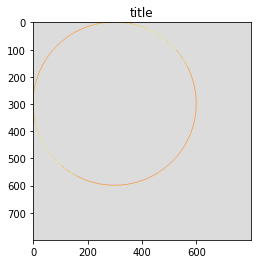

In [40]:
show_with_matplotlib(image, 'cv2.circle()')

# lineType parameter in drawing functions

In [41]:
image = np.zeros((20, 20, 3), dtype="uint8")
image[:] = colors['light_gray']

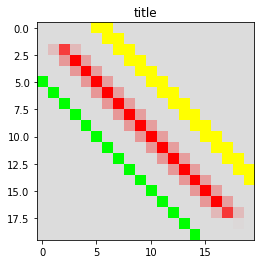

In [42]:
cv2.line(image, (5, 0), (20, 15), colors['yellow'], 1, cv2.LINE_4)
cv2.line(image, (0, 0), (20, 20), colors['red'], 1, cv2.LINE_AA)
cv2.line(image, (0, 5), (15, 20), colors['green'], 1, cv2.LINE_8)

show_with_matplotlib(image, 'LINE_4    LINE_AA    LINE_8')

# Writing text

## Drawing text

The cv2.putText() function has the following signature:

img = cv.putText( img, text, org, fontFace, fontScale, color, thickness=1, lineType= 8, bottomLeftOrigin=False)

org : coordinate where the provided text string starting 

In [46]:
image = np.zeros((120, 512, 3), dtype="uint8")
image[:] = colors['light_gray']
image.fill(255)

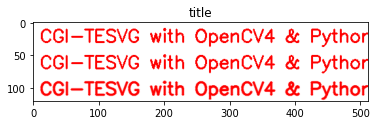

In [47]:
cv2.putText(image, 'CGI-TESVG with OpenCV4 & Python', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.9, colors['red'], 2,
            cv2.LINE_4)
cv2.putText(image, 'CGI-TESVG with OpenCV4 & Python', (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 0.9, colors['red'], 2,
            cv2.LINE_8)
cv2.putText(image, 'CGI-TESVG with OpenCV4 & Python', (10, 110), cv2.FONT_HERSHEY_SIMPLEX, 0.9, colors['red'], 2,
            cv2.LINE_AA)

show_with_matplotlib(image, 'cv2.putText()')

# OpenCV text fonts

All the available fonts in OpenCV are as follows:

- FONT_HERSHEY_SIMPLEX = 0
- FONT_HERSHEY_PLAIN = 1
- FONT_HERSHEY_DUPLEX = 2
- FONT_HERSHEY_COMPLEX = 3
- FONT_HERSHEY_TRIPLEX = 4
- FONT_HERSHEY_COMPLEX_SMALL = 5
- FONT_HERSHEY_SCRIPT_SIMPLEX = 6
- FONT_HERSHEY_SCRIPT_COMPLEX = 7